In [68]:
import pandas as pd

In [69]:
data = pd.read_csv( 'Churn_Modelling.csv' )
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
x = data.loc[ :, 'CreditScore' : 'EstimatedSalary' ]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [72]:
y = data.loc[ :, 'Exited' ]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [73]:
x.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()

In [76]:
print( x['Geography'].unique() )
x['Geography'] = le.fit_transform( x['Geography'] )
print()
print( x['Geography'].unique() )
print()
x.head()

['France' 'Spain' 'Germany']

[0 2 1]



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [77]:
print( x['Gender'].unique() )
x['Gender'] = le.fit_transform( x['Gender'] )
print()
print( x['Gender'].unique() )
print()
x.head()

['Female' 'Male']

[0 1]



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [78]:
x.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [79]:
x.shape

(10000, 10)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2 )

In [82]:
print( x_train.shape )
print()
x_train.head()

(8000, 10)



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4006,654,0,1,37,6,83568.55,1,1,0,47046.72
8203,778,2,1,33,5,116474.28,2,1,1,32757.55
9664,726,1,1,30,7,92847.59,1,1,0,146154.06
2164,767,2,1,77,8,149083.70,1,1,1,190146.83
8152,654,2,0,36,2,0.00,2,1,1,146652.11


In [83]:
print( x_test.shape )
print()
x_test.head()

(2000, 10)



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
924,785,0,0,34,9,70302.48,1,1,1,68600.36
2572,711,0,1,58,9,91285.13,2,1,1,26767.85
4586,602,0,0,25,0,0.00,2,1,1,101274.17
9405,575,0,1,36,7,0.00,1,1,1,55868.97
7994,519,1,0,21,1,151701.45,3,1,1,170138.68


In [84]:
print( y_train.shape )
print()
y_train.head()

(8000,)



4006    0
8203    0
9664    0
2164    0
8152    0
Name: Exited, dtype: int64

In [85]:
print( y_test.shape )
print()
y_test.head()

(2000,)



924     0
2572    0
4586    0
9405    1
7994    1
Name: Exited, dtype: int64

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc = StandardScaler()

In [88]:
x_test = sc.fit_transform( x_test )
x_test

array([[ 1.38240251, -0.91190407, -1.10665898, ...,  0.63754981,
         0.95501094, -0.53584269],
       [ 0.62634926, -0.91190407,  0.90362073, ...,  0.63754981,
         0.95501094, -1.27212139],
       [-0.48729676, -0.91190407, -1.10665898, ...,  0.63754981,
         0.95501094,  0.03923708],
       ...,
       [ 0.10528552, -0.91190407,  0.90362073, ...,  0.63754981,
        -1.04710843, -1.57265697],
       [ 1.04524363,  1.49894608,  0.90362073, ...,  0.63754981,
        -1.04710843,  1.40237222],
       [-0.44642901,  1.49894608,  0.90362073, ..., -1.5685049 ,
         0.95501094,  0.3712572 ]])

In [89]:
x_train = sc.fit_transform( x_train )
x_train

array([[ 0.0338678 , -0.89939614,  0.91462959, ...,  0.64823019,
        -1.02660376, -0.92420847],
       [ 1.32100491,  1.5191481 ,  0.91462959, ...,  0.64823019,
         0.97408566, -1.17195645],
       [ 0.78123773,  0.30987598,  0.91462959, ...,  0.64823019,
        -1.02660376,  0.79413089],
       ...,
       [-0.82768366, -0.89939614,  0.91462959, ..., -1.54266188,
        -1.02660376, -1.73084438],
       [ 0.14804931,  1.5191481 ,  0.91462959, ...,  0.64823019,
        -1.02660376,  0.55136642],
       [ 0.44907332, -0.89939614,  0.91462959, ...,  0.64823019,
         0.97408566, -0.70028451]])

In [90]:
from keras.models import Sequential
from keras.layers import Dense

In [91]:
model = Sequential()

In [92]:
model.add( Dense( output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10 ) )
model.add( Dense( output_dim = 6, init = 'uniform', activation = 'relu' ) )
model.add( Dense( output_dim = 1, init = 'uniform', activation = 'sigmoid' ) )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )

In [94]:
model.fit( x_train, y_train, batch_size = 10, nb_epoch = 100 )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.4896 - accuracy: 0.7955
Epoch 2/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4355 - accuracy: 0.7954
Epoch 3/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.4303 - accuracy: 0.7954
Epoch 4/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.4250 - accuracy: 0.8119
Epoch 5/100
8000/8000 [==============================] - 1s 100us/step - loss: 0.4218 - accuracy: 0.8265
Epoch 6/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.4194 - accuracy: 0.8269 0s - loss:
Epoch 7/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.4175 - accuracy: 0.8291
Epoch 8/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4155 - accuracy: 0.8316
Epoch 9/100
8000/8000 [==============================] - 1s 90us/step - loss: 0.4137 - accuracy: 0.8315
Epoch 10/100
8000/8000 [=========================

In [95]:
y_pred0to99 = model.predict( x_test[ : 100 ] )
print( y_pred0to99 )
print()
print()

for i in range( len( y_pred0to99 ) ):
    if( y_pred0to99[i] > 0.5 ):
        y_pred0to99[i] = 1
    else:
        y_pred0to99[i] = 0

y_pred0to99

[[0.09169057]
 [0.06315485]
 [0.03474659]
 [0.06235617]
 [0.23400524]
 [0.8125051 ]
 [0.94898033]
 [0.14717945]
 [0.04225215]
 [0.05621859]
 [0.11671185]
 [0.00778416]
 [0.24773455]
 [0.08200997]
 [0.02217042]
 [0.12078634]
 [0.09826073]
 [0.20119342]
 [0.19355083]
 [0.02773508]
 [0.01253283]
 [0.47828653]
 [0.15880376]
 [0.11662781]
 [0.04466873]
 [0.01602969]
 [0.18130347]
 [0.42207903]
 [0.01570183]
 [0.10733542]
 [0.06219709]
 [0.45398533]
 [0.05658948]
 [0.03580263]
 [0.21943173]
 [0.5776761 ]
 [0.45314312]
 [0.38441503]
 [0.03195372]
 [0.74647266]
 [0.028514  ]
 [0.02698922]
 [0.16000348]
 [0.23892373]
 [0.21689233]
 [0.17724124]
 [0.02096179]
 [0.13737062]
 [0.04043201]
 [0.09226742]
 [0.8930092 ]
 [0.07537392]
 [0.7967131 ]
 [0.12343076]
 [0.1952014 ]
 [0.00611603]
 [0.10869092]
 [0.08853784]
 [0.05335382]
 [0.00556472]
 [0.05328456]
 [0.01929227]
 [0.02788892]
 [0.54724807]
 [0.16885343]
 [0.06365478]
 [0.03303736]
 [0.06889692]
 [0.07583287]
 [0.02839586]
 [0.19523591]
 [0.24

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [96]:
y_pred100to199 = model.predict( x_test[ 100 : 200 ] )
print( y_pred100to199 )
print()
print()

for i in range( len( y_pred100to199 ) ):
    if( y_pred100to199[i] > 0.5 ):
        y_pred100to199[i] = 1
    else:
        y_pred100to199[i] = 0

y_pred100to199

[[0.20424718]
 [0.33981603]
 [0.01339802]
 [0.04792377]
 [0.34397137]
 [0.748593  ]
 [0.1281186 ]
 [0.01262334]
 [0.0595791 ]
 [0.11089933]
 [0.23339161]
 [0.02626112]
 [0.11225435]
 [0.42549685]
 [0.23804787]
 [0.49073046]
 [0.04061472]
 [0.11269304]
 [0.2639879 ]
 [0.19640797]
 [0.03161278]
 [0.16056308]
 [0.03955832]
 [0.09456804]
 [0.14752862]
 [0.49166417]
 [0.09183013]
 [0.23236054]
 [0.04564553]
 [0.16237172]
 [0.02035826]
 [0.09876841]
 [0.26727766]
 [0.07685643]
 [0.02567652]
 [0.02102137]
 [0.19362533]
 [0.5197503 ]
 [0.07747978]
 [0.02467152]
 [0.01760724]
 [0.03063241]
 [0.43904877]
 [0.10009861]
 [0.06988254]
 [0.81642073]
 [0.28270522]
 [0.1870924 ]
 [0.02897111]
 [0.17838246]
 [0.3242547 ]
 [0.00896037]
 [0.0105722 ]
 [0.20548058]
 [0.33340177]
 [0.13465995]
 [0.03646535]
 [0.02856925]
 [0.8865837 ]
 [0.23649555]
 [0.08901015]
 [0.15839186]
 [0.04970622]
 [0.05498892]
 [0.00826144]
 [0.5108805 ]
 [0.09681231]
 [0.100896  ]
 [0.7480862 ]
 [0.09149015]
 [0.0661059 ]
 [0.21

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
cm0to99 = confusion_matrix( y_test[ 0 : 100 ], y_pred0to99 )
print( cm0to99 )
print()
print()
correct = cm0to99[0][0] + cm0to99[1][1]
incorrect = len( cm0to99 ) - correct

print( f"Accuracy = { correct/len( y_pred0to99 ) }" )

[[84  3]
 [ 7  6]]


Accuracy = 0.9


In [99]:
cm100to199 = confusion_matrix( y_test[ 100 : 200 ], y_pred100to199 )
print( cm100to199 )
print()
print()
correct = cm100to199[0][0] + cm100to199[1][1]
incorrect = len( cm100to199 ) - correct

print( f"Accuracy = { correct/len( y_pred100to199 ) }" )

[[70  4]
 [20  6]]


Accuracy = 0.76


In [100]:
"""
We can see there is a lot of diffrence between accuracy of y_pred[ : 100 ] and accuracy of y_pred[ 100 : 200 ]
Which should not happen from diffrent to diffrent inputs.

So, Now the Question is how to finalize it ?
Answer : K - Fold Cross Validation
"""

'\nWe can see there is a lot of diffrence between accuracy of y_pred[ : 100 ] and accuracy of y_pred[ 100 : 200 ]\nWhich should not happen from diffrent to diffrent inputs.\n\nSo, Now the Question is how to finalize it ?\nAnswer : K - Fold Cross Validation\n'

In [101]:
from IPython.display import Image

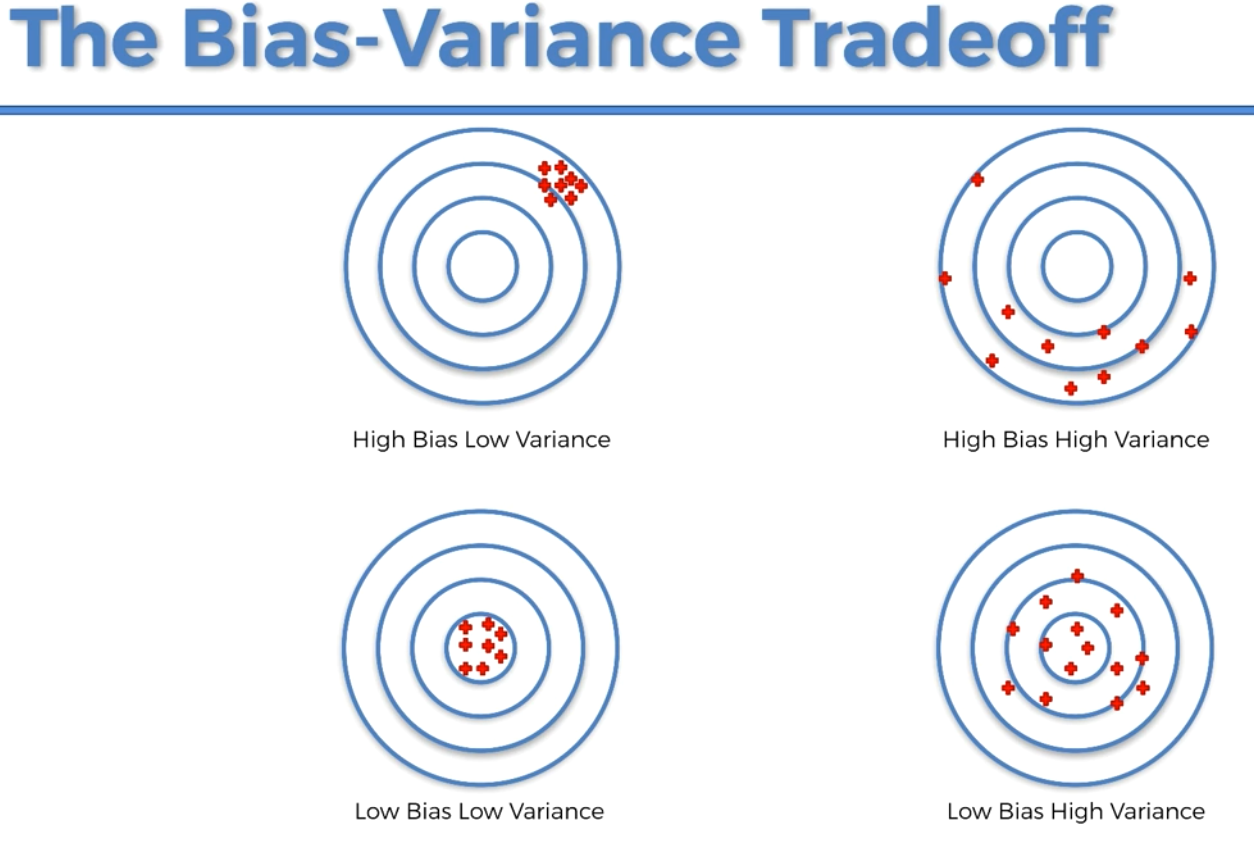

In [102]:
Image("Images/Bais_variance_Trade_off.PNG")

In [103]:
"""
In above image, we can see diffrent types of accuracies,
    Let's Categories this Image on the basis of Accuracy
    Here Bias is inversly proportional to Accuracy
    
    a) High Accuracy( Low Bias )
        a.a) High Variance for diffrent test sets -
        a.b) Low Variance for diffrent test sets
        
    b) Low Accuracy(High Bias )
        b.a) High Variance for diffrent test sets -
        b.b) Low Variance for diffrent test sets

So, To avoid this variance and Get good accuracy we need K - Fold Cross Validation,    
"""

"\nIn above image, we can see diffrent types of accuracies,\n    Let's Categories this Image on the basis of Accuracy\n    Here Bias is inversly proportional to Accuracy\n    \n    a) High Accuracy( Low Bias )\n        a.a) High Variance for diffrent test sets -\n        a.b) Low Variance for diffrent test sets\n        \n    b) Low Accuracy(High Bias )\n        b.a) High Variance for diffrent test sets -\n        b.b) Low Variance for diffrent test sets\n\nSo, To avoid this variance and Get good accuracy we need K - Fold Cross Validation,    \n"

In [104]:
"""
Now the question is what is K - Fold Cross validation ?
Ans :- 
"""

'\nNow the question is what is K - Fold Cross validation ?\nAns :- \n'

In [105]:
#We need to import apply k fold oncept here and with the help of keras,
#Already inbuilt function is available for this operation which is KerasClassifier and present in keras.wrappers.scikit_learn

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier        #Keras + k-fold 
from sklearn.model_selection import cross_val_score         #Using this module, we implement k-fold concept

In [107]:
#Now KerasClassifier is a class, Inside the constructor of this class. One argument accepts functon which will make the
#structure of neural network everytime whenever object creation occurs

In [108]:
def build_neural_network():
    model = Sequential()
    model.add( Dense( output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10 ) )
    model.add( Dense( output_dim = 6, init = 'uniform', activation = 'relu' ) )
    model.add( Dense( output_dim = 1, init = 'uniform', activation = 'sigmoid' ) )
    model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
    return model

In [109]:
#see, ?KerasClassifier

keras_classifier_ob = KerasClassifier( build_fn = build_neural_network
                                      ,batch_size = 10
                                      ,nb_epoch = 100 )

In [110]:
accuracies = cross_val_score( estimator = keras_classifier_ob
                             ,X = x_train
                             ,y = y_train
                             ,cv = 15                 #cv indicates, how may folds we want to be implemented while computation
                             ,n_jobs = -1 )           #n_job is the number of CPU used. -1 represents all CPUs.
accuracies

array([0.79962546, 0.80337077, 0.76966292, 0.79213482, 0.77902621,
       0.81801128, 0.79737335, 0.793621  , 0.80487806, 0.7861163 ,
       0.7861163 , 0.80863041, 0.81801128, 0.77673548, 0.79924953])

In [111]:
#So, we can see we are getting 10 accuracies for the same dataset.
max( accuracies )

0.8180112838745117

In [112]:
"""
Now we have to find the variance to understand our list of acccuries falls in which k-fold category,

1) High Bais Low Variance
2) High Bais High Variance
3) Low Bais Low Variance
4) Low Bais High Variance
"""

'\nNow we have to find the variance to understand our list of acccuries falls in which k-fold category,\n\n1) High Bais Low Variance\n2) High Bais High Variance\n3) Low Bais Low Variance\n4) Low Bais High Variance\n'

In [113]:
mean = accuracies.mean()
mean

0.7955042123794556

In [114]:
variance = accuracies.std()
variance

0.013789895450818351

In [115]:
"""
So, variance is less 2.5% here, which is very high. 
So, we need to take this variance to find that our output fall under which category.

We can say, our output is falling in low bias( High Accuracy) and high variance.
"""

'\nSo, variance is less 2.5% here, which is very high. \nSo, we need to take this variance to find that our output fall under which category.\n\nWe can say, our output is falling in low bias( High Accuracy) and high variance.\n'